<a href="https://colab.research.google.com/github/lalalalalala-hi/AI-and-Machine-Learning/blob/main/Fire_Detection_using_VGG_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library


*   os - OS interaction
*   tensorflow - Machine learning and deep learning
*   tensorflow.keras - High-level API for neural networks
*   image_dataset_from_directory - Load images from directories
*   matplotlib.pyplot- Plotting and visualization




In [ ]:
!pip install kaggle

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Download Dataset from Kaggle

In [ ]:
# Move kaggle.json to the correct location
os.makedirs('/root/.kaggle/', exist_ok=True)
!mv kaggle.json /root/.kaggle/

# Ensure the permissions are correct
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle datasets download -d phylake1337/fire-dataset

# Unzip the downloaded dataset
!unzip fire-dataset.zip -d fire-dataset

# List files in the current directory
!ls

# List files in the fire-dataset directory
!ls fire-dataset

Dataset URL: https://www.kaggle.com/datasets/phylake1337/fire-dataset
License(s): CC0-1.0
100% 387M/387M [00:20<00:00, 22.1MB/s]
100% 387M/387M [00:20<00:00, 19.9MB/s]
Archive:  fire-dataset.zip
  inflating: fire-dataset/fire_dataset/fire_images/fire.1.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.10.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.100.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.101.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.102.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.103.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.104.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.105.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.106.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.107.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.108.png  
  inflating: fire-dataset/fire_dataset/fire_images/fire.109.png  
  inflating: fir

# Loading Data and Data Preprocessing

In [ ]:
# Define constants
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
# Function to load and preprocess data
def load_data(data_dir, batch_size, img_size):
    train = image_dataset_from_directory(data_dir,
                                         validation_split=0.2,
                                         subset="training",
                                         seed=123,
                                         image_size=img_size,
                                         batch_size=batch_size)

    val = image_dataset_from_directory(data_dir,
                                       validation_split=0.2,
                                       subset="validation",
                                       seed=123,
                                       image_size=img_size,
                                       batch_size=batch_size)
    return train, val

# Load data
data_dir = "fire-dataset/fire_dataset"
train, val = load_data(data_dir, BATCH_SIZE, IMG_SIZE)

Found 999 files belonging to 2 classes.
Using 800 files for training.
Found 999 files belonging to 2 classes.
Using 199 files for validation.


# Data Exploration and Visualization

In [ ]:
# Display class names
class_names = train.class_names
print(class_names)

['fire_images', 'non_fire_images']


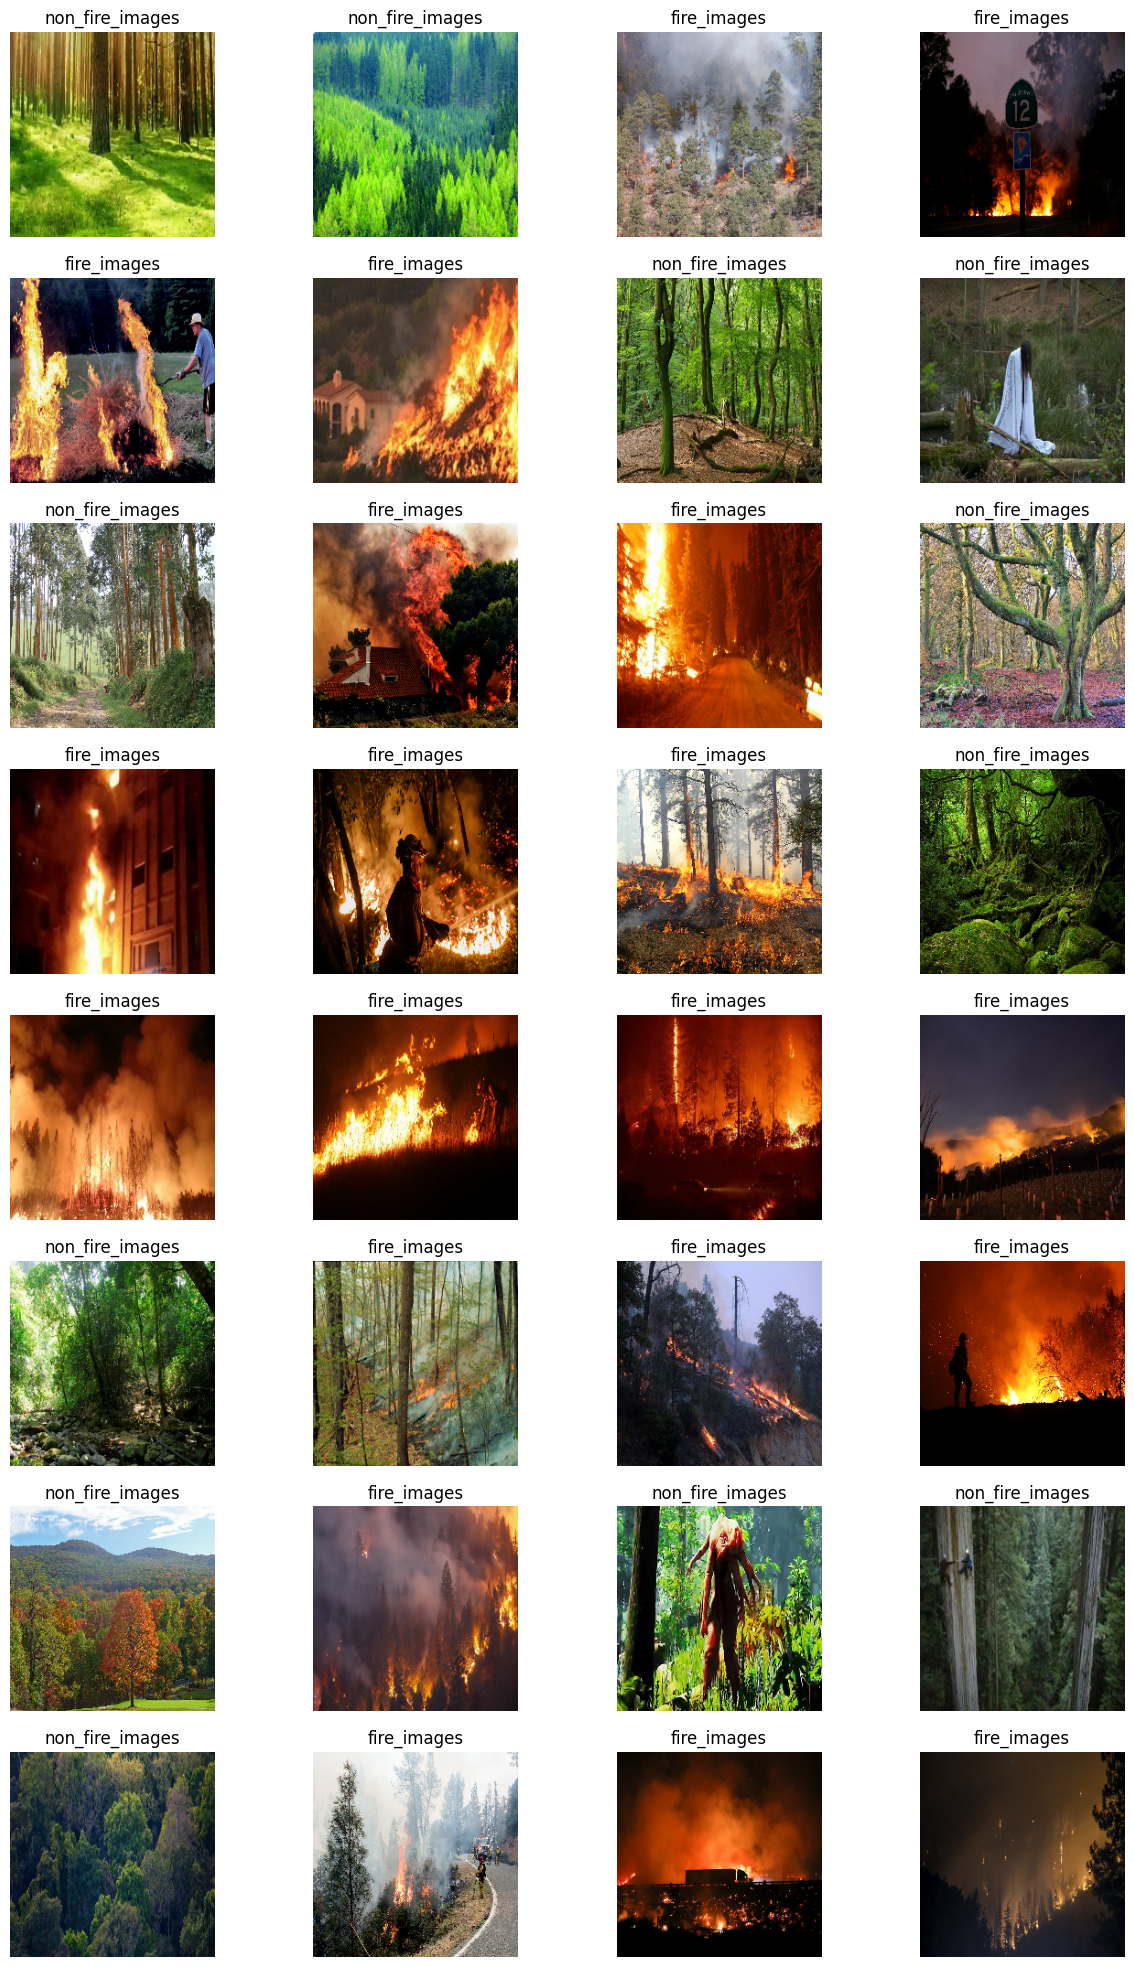

In [ ]:
# Function to visualize data
def visualize_data(train, class_names):
    plt.figure(figsize=(15, 25))
    for images, labels in train.take(1):
        for i in range(32):
            ax = plt.subplot(8, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

# Visualize data
visualize_data(train, class_names)

# VGG Model Building and Compilation

In [ ]:
# Function to build model
def build_model(img_size):
    base_model = tf.keras.applications.VGG16(input_shape=img_size + (3,),
                                             include_top=False,
                                             weights='imagenet')
    base_model.trainable = False

    model = keras.models.Sequential([
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Build model
model = build_model(IMG_SIZE)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14739777 (56.23 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


# Training VGG Model

In [ ]:
# Function to train model
def train_model(model, train, val, epochs=10):
    history = model.fit(train, validation_data=val, epochs=epochs)
    return history

# Train model
history = train_model(model, train, val)

Epoch 1/10
25/25 [==============================] - 19s 581ms/step - loss: 2.2906 - accuracy: 0.8625 - val_loss: 1.2179 - val_accuracy: 0.8744
Epoch 2/10
25/25 [==============================] - 16s 518ms/step - loss: 0.5959 - accuracy: 0.9500 - val_loss: 0.6322 - val_accuracy: 0.9548
Epoch 3/10
25/25 [==============================] - 16s 506ms/step - loss: 0.0966 - accuracy: 0.9912 - val_loss: 1.2245 - val_accuracy: 0.9447
Epoch 4/10
25/25 [==============================] - 17s 511ms/step - loss: 0.0155 - accuracy: 0.9962 - val_loss: 1.0322 - val_accuracy: 0.9497
Epoch 5/10
25/25 [==============================] - 17s 511ms/step - loss: 4.7353e-04 - accuracy: 1.0000 - val_loss: 1.0149 - val_accuracy: 0.9497
Epoch 6/10
25/25 [==============================] - 16s 507ms/step - loss: 1.0491e-04 - accuracy: 1.0000 - val_loss: 1.0475 - val_accuracy: 0.9497
Epoch 7/10
25/25 [==============================] - 16s 510ms/step - loss: 9.0500e-04 - accuracy: 1.0000 - val_loss: 0.9437 - val_accu

# Model Evaluation

In [ ]:
# Function to print final accuracy and loss
def print_final_metrics(history):
    final_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_acc*100:.2f}%")
    print(f"Final Validation Accuracy: {final_val_acc*100:.2f}%")
    print(f"Final Training Loss: {final_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

# Print final accuracy and loss
print_final_metrics(history)

Final Training Accuracy: 100.00%
Final Validation Accuracy: 94.47%
Final Training Loss: 0.0001
Final Validation Loss: 0.9807


# Data Visualization

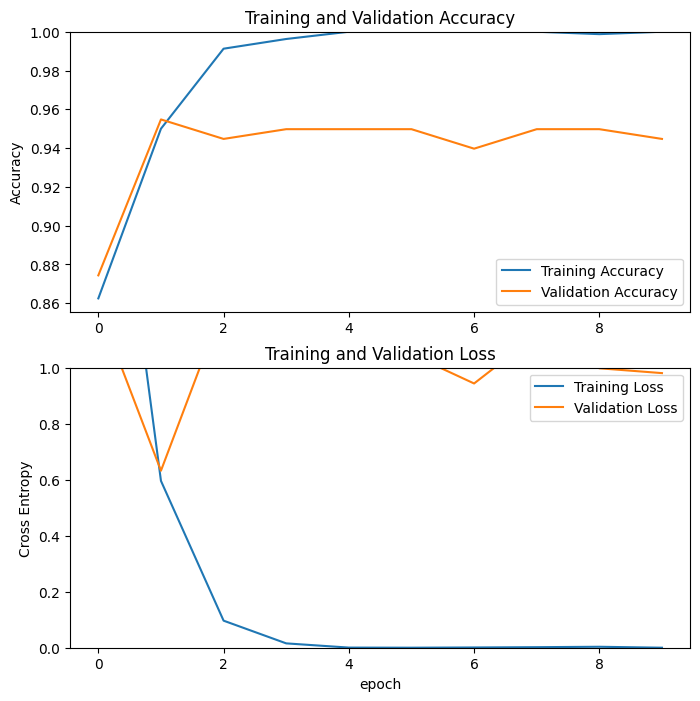

In [ ]:
# Function to plot training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()), 1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0, 1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

# Plot training history
plot_history(history)